# **Neural Network Framework - Handwritten Digit Recognition**

# Step 1: Importing Libraries
Importing the required libraries for data loading, preprocessing, and building the neural network.


In [16]:
#pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

#Checking the version of TensorFlow

print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.13.0


# Step 2: Loading and Exploreing Data
Loading the MNIST dataset and visualizing some sample images to understand the data.


In [2]:
# Loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Checking shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
# Here the shape of the data is 3D, meaning it has 3 dimensions. 
# The first dimension is the number of images. 
# The second and third dimensions are the height and width of the images. 

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


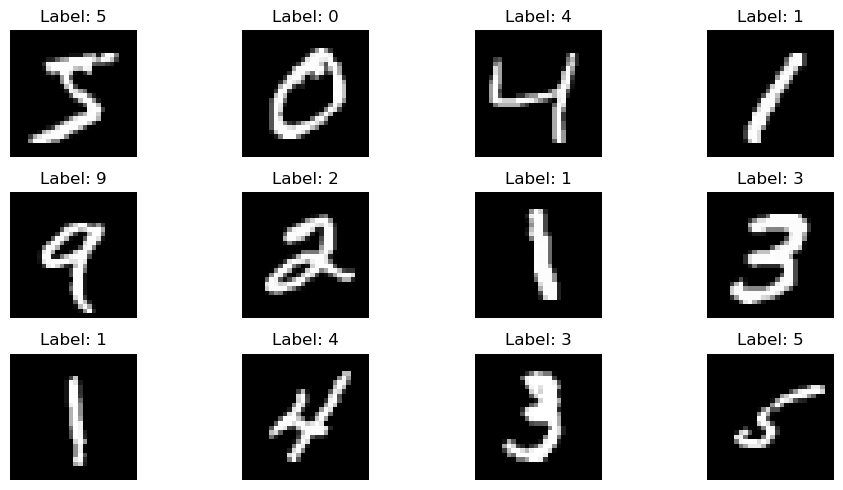

In [4]:
# Some sample images
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:

# Counts occurrences of each digit class
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Plot class distribution for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(unique_train, counts_train, color="skyblue")
axes[0].set_xlabel("Digit Class (0-9)")
axes[0].set_ylabel("Count")
axes[0].set_title("Class Distribution in Training Data")
axes[0].set_xticks(unique_train)

axes[1].bar(unique_test, counts_test, color="lightcoral")
axes[1].set_xlabel("Digit Class (0-9)")
axes[1].set_ylabel("Count")
axes[1].set_title("Class Distribution in Test Data")
axes[1].set_xticks(unique_test)

plt.show()

# Print actual counts
print("Training Data Distribution:")
for digit, count in zip(unique_train, counts_train):
    print(f"Digit {digit}: {count} samples")

print("\nTest Data Distribution:")
for digit, count in zip(unique_test, counts_test):
    print(f"Digit {digit}: {count} samples")


Training Data Distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples

Test Data Distribution:
Digit 0: 980 samples
Digit 1: 1135 samples
Digit 2: 1032 samples
Digit 3: 1010 samples
Digit 4: 982 samples
Digit 5: 892 samples
Digit 6: 958 samples
Digit 7: 1028 samples
Digit 8: 974 samples
Digit 9: 1009 samples


# Step 3: Data Preprocessing
Normalizing pixel values and reshaping input for the neural network. Also, converting labels to one-hot encoding.


**Normalizing Pixel Values**

- The original pixel values range from **0 to 255**.
- We scale them to **[0, 1]** by dividing by **255**.
- This helps the neural network **train faster** and improves numerical stability.


In [6]:
# Normalizing pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Reshaping Images**
- Each image is **28×28 pixels** (2D).
- Neural networks require a **1D input**, so we reshape **(28×28 → 784)**.
- This ensures the data matches the expected input format for a fully connected network.

In [7]:
# Reshaping input to flatten the images (28x28 → 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

**One-Hot Encoding Labels**
- The labels are digits **(0 to 9)**, but we need categorical outputs.
- We convert them into **one-hot vectors** like:
  - `3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`
- This format works best with **categorical cross-entropy loss**.


In [8]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
# Check the shape of the data after preprocessing:
print(f"Training data shape after preprocessing: {x_train.shape}, {y_train.shape}")
print(f"Test data shape after preprocessing: {x_test.shape}, {y_test.shape}")

Training data shape after preprocessing: (60000, 784), (60000, 10)
Test data shape after preprocessing: (10000, 784), (10000, 10)


# Step 4: Building the Neural Network
## Model Architecture:
- **Input Layer**: 784 neurons (28x28 image flattened)
- **Hidden Layers**:
  - Layer 1: 128 neurons, Activation: ReLU
  - Layer 2: 64 neurons, Activation: ReLU
- **Output Layer**: 10 neurons (one for each digit), Activation: Softmax

We use **ReLU** in hidden layers because it helps the network learn complex patterns. The **Softmax** function in the output layer converts raw scores into probabilities.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer
])

# Compiling the model
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy
)

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4.1: Model Summary
### Layer Details:
| Layer | Type | Output Shape | Param # | Explanation |
|-------|------|--------------|---------|-------------|
| **dense** | `Dense` | `(None, 128)` | `100,480` | First hidden layer with 128 neurons using ReLU activation |
| **dense_1** | `Dense` | `(None, 64)` | `8,256` | Second hidden layer with 64 neurons using ReLU activation |
| **dense_2** | `Dense` | `(None, 10)` | `650` | Output layer with 10 neurons (for 10 digit classes) using Softmax |

### **Parameter Calculation:**
- **First Hidden Layer**:  
`(784 weights + 1 bias) × 128 neurons = 100,480`  
- **Second Hidden Layer**:  
`(128 weights + 1 bias) × 64 neurons = 8,256`  
- **Output Layer**:  
`(64 weights + 1 bias) × 10 neurons = 650`  
- **Total Parameters**: `100,480 + 8,256 + 650 = 109,386`  

 All parameters are **trainable** since the model is built from scratch.


## 4.2: Activation Functions in Our Model

### **ReLU (Rectified Linear Unit) – Hidden Layers**
- Our neural network takes **28×28 grayscale images** (flattened to 784 values) as input.
- The hidden layers apply **ReLU activation** to introduce **non-linearity**, helping the network learn complex patterns in handwritten digits.
- The function is:
  
  ***f(x) = max(0, x)***
  
  - If the input is **positive**, it stays the same.
  - If the input is **negative**, it becomes **0**.
- **Why ReLU?**
  - Digits in MNIST have many variations (different handwriting styles, strokes, etc.).
  - A **linear model wouldn't capture these variations well**.
  - ReLU helps detect useful patterns (edges, curves, intersections) by allowing neurons to "activate" only when needed.

### **Softmax – Output Layer**
- The final layer of our network has **10 neurons**, one for each digit (0-9).
- Each neuron outputs a score (logit) representing how likely the input is that digit.
- Softmax converts raw scores (**logits**) into probabilities:

$$
P(y_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}
$$


where:

- ***P(yi)*** is the probability of the digit being class ***i***.
- ***Zi*** is the raw score (logit) from the model for class ***i***.
- ***N*** is the total number of classes (**10** for MNIST).
- The denominator ensures the probabilities sum to **1**.
 


- **Why Softmax?**
  - It ensures the outputs are **interpretable as probabilities**.
  - The sum of all outputs is **exactly 1** (like a probability distribution).
  - The network predicts the digit with the **highest probability**.

### **Example:**
- Suppose we pass an image of the digit **7**.
- The final layer outputs raw scores like:  
  `[2.1, 1.2, -0.5, 3.7, 0.8, 2.9, 0.3, 5.1, 1.6, -1.2]`
- After applying Softmax, these are converted into probabilities:  
  `[0.01, 0.005, 0.001, 0.05, 0.003, 0.02, 0.002, 0.9, 0.008, 0.0005]`
- The highest probability (0.9) is for the digit **7**, so the model predicts **7**.

Using **ReLU in hidden layers** and **Softmax in the output layer** ensures our model learns **rich features** while making **accurate predictions**.

### **Compiling the Model**
Before training, we need to compile the model with:
- **Loss function**: `categorical_crossentropy`  
  - Since we have **10 output classes (digits 0-9)**, this is the best choice.
- **Optimizer**: `sgd` (Stochastic Gradient Descent)  
  - It updates weights in small steps to minimize loss.
- **Metric**: `accuracy`  
  - Helps track how well the model is classifying digits.

## 4.3 Visulisation of model architechture

In [11]:
# Importing a gif to visualise the model architechture (Gif from Medium)
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/0*u5-PcKYVfUE5s2by.gif', width=800, height=400) 

## Step 5: Training the Model

### **Training the Model**
We train the model using:
- **Training dataset (`x_train, y_train`)**.
- **Validation dataset (`x_test, y_test`)** to track performance.
- **Batch size = 32** (processes 32 images per update).
- **Epochs = 15** (repeats training 15 times over the dataset).

---


In [12]:
# Training the Model
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=15, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6187 - accuracy: 0.8344 - val_loss: 0.3242 - val_accuracy: 0.9089
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3019 - accuracy: 0.9143 - val_loss: 0.2656 - val_accuracy: 0.9252
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2510 - accuracy: 0.9290 - val_loss: 0.2245 - val_accuracy: 0.9367
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2160 - accuracy: 0.9385 - val_loss: 0.1986 - val_accuracy: 0.9441
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1900 - accuracy: 0.9466 - val_loss: 0.1800 - val_accuracy: 0.9479
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1695 - accuracy: 0.9518 - val_loss: 0.1628 - val_accuracy: 0.9522
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1528 - accuracy: 0.9564 - val_loss: 0.1493 - val_accuracy

## Step 6: Evaluating the Model 

After training, we need to test how well the model performs on **unseen data** (test set).  
We will:
- Calculate **test accuracy** and **test loss** using `model.evaluate()`.  
- Compare **training vs. validation accuracy** to check for overfitting.

### **Expected Outcome**
- A **high test accuracy (~98%)** means the model generalizes well.  
- If validation accuracy is much lower than training accuracy, the model might be **overfitting**.


In [13]:
# Evaluating the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9704

Test Accuracy: 0.9704


## Step 7: Training Visualization

- **Accuracy Curve:** Helps us see how well the model is learning.  
- **Loss Curve:** Shows if the model is minimizing errors effectively.  

 **Interpreting the Graphs**
- If **training accuracy is high** but **validation accuracy is low**, the model is overfitting.  
- If both curves are increasing smoothly, the model is learning properly.  
- If **loss is not decreasing**, we might need to **adjust hyperparameters**.


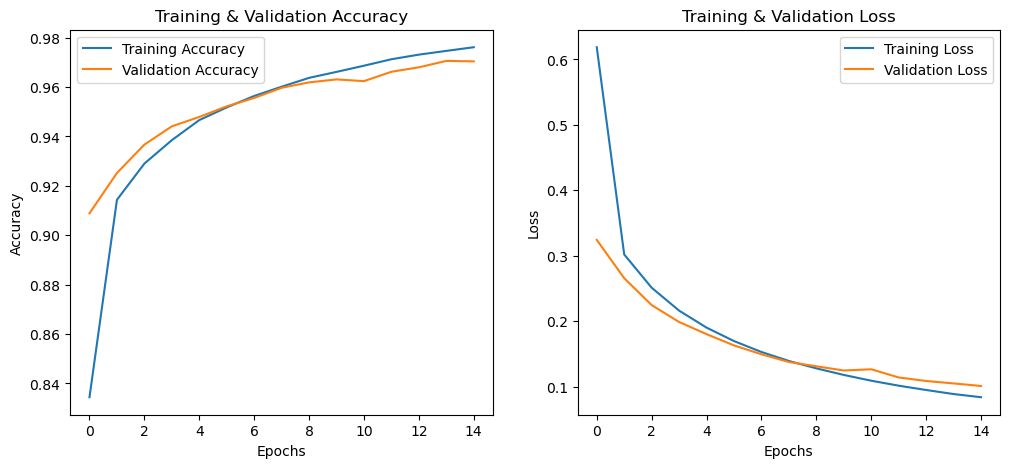

In [14]:
import matplotlib.pyplot as plt

# Retrieve accuracy & loss history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plotting Loss
plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


**Observations**
- **Accuracy (Left Plot)**: Training and validation accuracy **increase steadily**, reaching **~97%**.  
- **Loss (Right Plot)**: Training and validation loss **decrease smoothly**, showing good learning.  

**Key Takeaways**

- No signs of major **overfitting** or **underfitting**.  
- Model generalizes well with **high validation accuracy**.  
- Further fine-tuning could include **extra epochs** or **regularization**.  

---


## Step 8: Making Predictions 

Now that our model is trained, let's test its ability to classify handwritten digits, keeping following things in mind:
- Pick **random test images**.  
- Get **predicted vs. actual labels**.  
- Display **misclassifications (if any)**.

**Expected Outcome**
- The model should correctly classify most digits.  
- Any misclassifications may indicate areas for improvement.


1/1 [==============================] - 0s 123ms/step


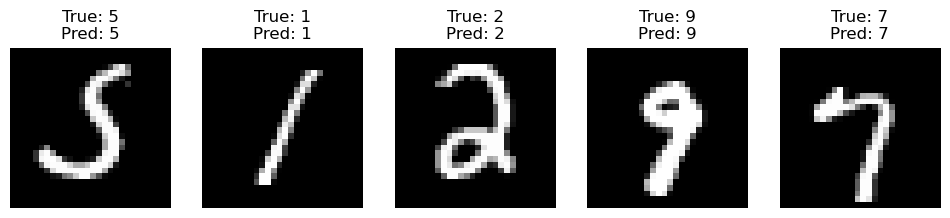

In [15]:
# Selectinf a few random test images
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[random_indices]
sample_labels = np.argmax(y_test[random_indices], axis=1)  # True labels

# Getting model predictions
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)  # Predicted labels

# Plotting images with predictions
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")  # Reshape back to 28x28
    plt.axis("off")
    plt.title(f"True: {sample_labels[i]}\nPred: {predicted_labels[i]}")
plt.show()

## JUST A FUN BIT

Creating a Tkinter App for Live Digit Recognition and then passing it through the neural network model to see how that works

In [17]:
# Saving the Model
model.save('mnist_model.h5')

1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


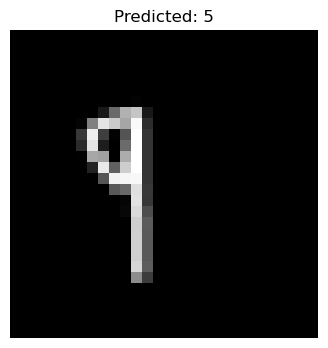

1/1 [==============================] - 0s 21ms/step


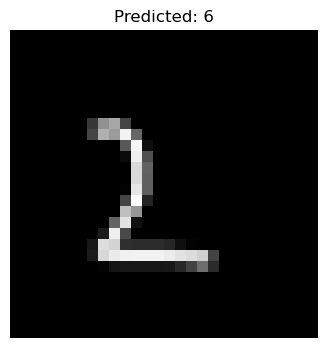

1/1 [==============================] - 0s 19ms/step


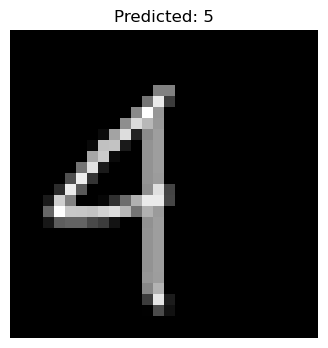

In [7]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt

# Load the trained MNIST neural network model
model = tf.keras.models.load_model("mnist_model.h5")  # Ensure the model path is correct

# Initialize Tkinter window
window = tk.Tk()
window.title("Handwritten Digit Recognition")

# Canvas settings
canvas_width = 200
canvas_height = 200
canvas = tk.Canvas(window, width=canvas_width, height=canvas_height, bg='white')
canvas.pack()

# Create a blank image for capturing the drawing
img = Image.new("L", (canvas_width, canvas_height), color=255)  # Grayscale image
draw = ImageDraw.Draw(img)

# Variable to track drawing
is_drawing = False

# Start drawing
def start_drawing(event):
    global is_drawing
    is_drawing = True
    canvas.old_coords = event.x, event.y

# Draw on canvas
def draw_line(event):
    global is_drawing
    if is_drawing:
        x, y = event.x, event.y
        x1, y1 = canvas.old_coords
        canvas.create_line(x1, y1, x, y, width=8, fill='black', capstyle=tk.ROUND, smooth=tk.TRUE)
        draw.line([x1, y1, x, y], fill=0, width=8)
        canvas.old_coords = x, y

# Stop drawing
def stop_drawing(event):
    global is_drawing
    is_drawing = False

# Clear the canvas
def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, canvas_width, canvas_height], fill=255)
    result_label.config(text="")  # Clear previous prediction

# Process image and predict the digit
def predict_digit():
    # Resize image to 28x28 pixels
    img_resized = img.resize((28, 28))
    
    # Invert colors (black on white -> white on black)
    img_inverted = ImageOps.invert(img_resized)

    # Convert image to a NumPy array and normalize to [0,1]
    img_array = np.array(img_inverted) / 255.0  # Convert pixel values to 0-1 range

    # Reshape to match the model input (1, 28*28)
    img_reshaped = img_array.reshape(1, 28*28)

    # Predict the digit
    prediction = model.predict(img_reshaped)
    predicted_label = np.argmax(prediction)  # Get the highest probability class

    # Show the prediction result
    result_label.config(text=f"Predicted Digit: {predicted_label}", font=("Arial", 18, "bold"))

    # Display the processed image
    plt.figure(figsize=(4, 4))
    plt.imshow(img_array, cmap='gray')
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

# Bind mouse events
canvas.bind('<ButtonPress-1>', start_drawing)
canvas.bind('<B1-Motion>', draw_line)
canvas.bind('<ButtonRelease-1>', stop_drawing)

# Buttons to clear and predict
clear_button = tk.Button(window, text="Clear Canvas", command=clear_canvas)
clear_button.pack(side=tk.LEFT, padx=10, pady=10)

predict_button = tk.Button(window, text="Predict Digit", command=predict_digit)
predict_button.pack(side=tk.RIGHT, padx=10, pady=10)

# Label to show prediction
result_label = tk.Label(window, text="", font=("Arial", 18))
result_label.pack()

# Run the Tkinter application
window.mainloop()


**The code returns mostly wrong results, potetial reasons could be:**

***Input mismatch:***
- Training Data: Clean, centered 28×28 grayscale digits.

- Live Drawing: Larger canvas (200×200), possibly not centered or scaled well, uneven thickness.

***Solution:***

- Preprocessing the drawing to mimic MNIST digits more closely

## Final App for live drwan digit detection with revised image processing logic:

Visualisation of the app working. 

Courtsey okdalto (link: https://youtu.be/enjnRVUoH9g?si=C5rn_7B2VMtEBrnA)



In [8]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
import tensorflow as tf
from scipy.ndimage import center_of_mass, shift

# Load the trained model
model = tf.keras.models.load_model("mnist_model.h5")

# Initialize window
window = tk.Tk()
window.title("Digit Recognizer")
window.configure(bg="white")
window.geometry("300x380")

# Canvas config
canvas_size = 200
canvas = tk.Canvas(window, width=canvas_size, height=canvas_size, bg='white', bd=2, relief="ridge")
canvas.pack(pady=10)

# Image draw object
img = Image.new("L", (canvas_size, canvas_size), color=255)
draw = ImageDraw.Draw(img)

# Drawing logic
is_drawing = False

def start_drawing(event):
    global is_drawing
    is_drawing = True
    canvas.old_coords = event.x, event.y

def draw_line(event):
    if is_drawing:
        x, y = event.x, event.y
        x1, y1 = canvas.old_coords
        canvas.create_line(x1, y1, x, y, width=10, fill='black', capstyle=tk.ROUND, smooth=tk.TRUE)
        draw.line([x1, y1, x, y], fill=0, width=10)
        canvas.old_coords = x, y

def stop_drawing(event):
    global is_drawing
    is_drawing = False

# Clear canvas and label
def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, canvas_size, canvas_size], fill=255)
    result_label.config(text="Draw a digit", fg="gray")

# Center digit in image
def center_digit(img_array):
    cy, cx = center_of_mass(img_array)
    shift_y = 14 - cy
    shift_x = 14 - cx
    return shift(img_array, shift=[shift_y, shift_x], mode='constant')

# Predict digit
def predict_digit():
    # Process image
    img_resized = img.resize((28, 28))
    img_inverted = ImageOps.invert(img_resized)
    img_array = np.array(img_inverted).astype("float32") / 255.0
    img_array = np.where(img_array > 0.2, 1.0, 0.0)
    img_centered = center_digit(img_array)
    img_input = img_centered.reshape(1, 784)

    # Predict
    prediction = model.predict(img_input)
    predicted_digit = np.argmax(prediction)

    result_label.config(text=f"Predicted Digit: {predicted_digit}", fg="black")

# Buttons
button_frame = tk.Frame(window, bg="white")
button_frame.pack(pady=10)

clear_btn = tk.Button(button_frame, text="Clear", command=clear_canvas, bg="#f44336", fg="white", width=10)
clear_btn.pack(side=tk.LEFT, padx=10)

predict_btn = tk.Button(button_frame, text="Predict", command=predict_digit, bg="#4CAF50", fg="white", width=10)
predict_btn.pack(side=tk.RIGHT, padx=10)

# Result label
result_label = tk.Label(window, text="Draw a digit", font=("Helvetica", 20), bg="white", fg="gray")
result_label.pack(pady=10)

# Bind mouse events
canvas.bind("<ButtonPress-1>", start_drawing)
canvas.bind("<B1-Motion>", draw_line)
canvas.bind("<ButtonRelease-1>", stop_drawing)

# Run app
window.mainloop()


1/1 [==============================] - 0s 22ms/step
